## Load Libraries

In [0]:
import pandas as pd
from fbprophet import Prophet

## Load Data



In [0]:
df = pd.read_csv('./BeerWineLiquor.csv')

In [7]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


### Format the Data

In [0]:
df.columns = ['ds','y']

In [0]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [8]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Pronósticos del futuro

### Paso 1: Crear el dataframe donde colocaremos los resultados



In [0]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [10]:
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [11]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [12]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [13]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01



### Paso 2: Calcular los pronósticos y guardarlos en forecast

In [0]:
forecast = m.predict(future)

In [15]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1765.609137,1123.522725,1471.706383,1765.609137,1765.609137,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,0.0,0.0,0.0,1304.176066
1,1992-02-01,1768.666905,1183.369633,1499.082427,1768.666905,1768.666905,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,0.0,0.0,0.0,1341.969954
2,1992-03-01,1771.527398,1434.710173,1759.960276,1771.527398,1771.527398,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,0.0,0.0,0.0,1592.876098
3,1992-04-01,1774.585166,1397.538285,1744.392385,1774.585166,1774.585166,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,0.0,0.0,0.0,1578.438018
4,1992-05-01,1777.544296,1645.716292,1984.967490,1777.544296,1777.544296,44.823220,44.823220,44.823220,44.823220,44.823220,44.823220,0.0,0.0,0.0,1822.367516


In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5201.232291,5072.507621,5404.384398,5189.396686,5212.518810,39.473660,39.473660,39.473660,39.473660,39.473660,39.473660,0.0,0.0,0.0,5240.705951
344,2020-09-01,5217.295945,4910.475423,5251.113081,5204.462283,5229.388062,-133.727623,-133.727623,-133.727623,-133.727623,-133.727623,-133.727623,0.0,0.0,0.0,5083.568322
345,2020-10-01,5232.841416,5025.325184,5350.292430,5219.122712,5245.677338,-43.568316,-43.568316,-43.568316,-43.568316,-43.568316,-43.568316,0.0,0.0,0.0,5189.273100
346,2020-11-01,5248.905070,5173.510892,5486.784747,5233.791008,5263.241292,87.524399,87.524399,87.524399,87.524399,87.524399,87.524399,0.0,0.0,0.0,5336.429469
347,2020-12-01,5264.450542,6159.476246,6496.983279,5248.222477,5280.001266,1070.542133,1070.542133,1070.542133,1070.542133,1070.542133,1070.542133,0.0,0.0,0.0,6334.992675


In [17]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [18]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4629.426372,4459.995441,4799.653386
337,2020-02-01,4680.226146,4515.424686,4835.173850
338,2020-03-01,4943.299086,4776.911301,5104.386760
339,2020-04-01,4941.866893,4784.013929,5102.021727
340,2020-05-01,5198.382732,5041.410922,5370.283031
341,2020-06-01,5178.976562,5015.045663,5343.312520
342,2020-07-01,5311.178497,5139.759169,5470.991213
343,2020-08-01,5240.705951,5072.507621,5404.384398
344,2020-09-01,5083.568322,4910.475423,5251.113081
345,2020-10-01,5189.273100,5025.325184,5350.292430


### Graficando los pronósticos


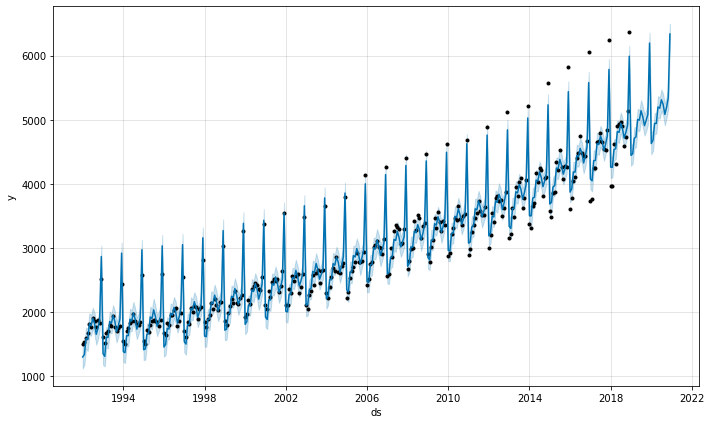

In [19]:
m.plot(forecast);

In [0]:
pd.plotting.register_matplotlib_converters()

(735234.0, 738156.0)

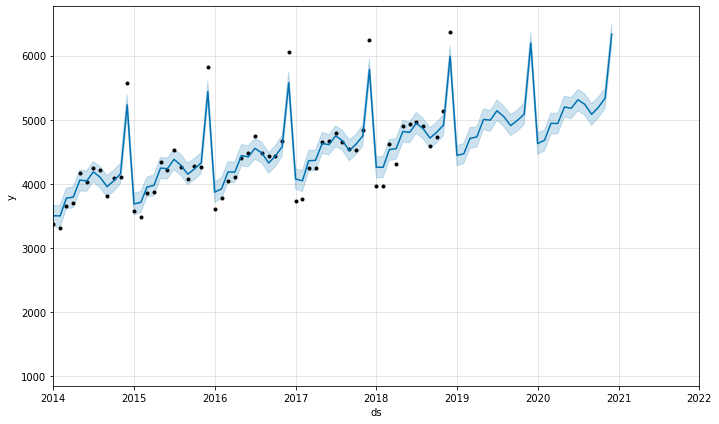

In [21]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

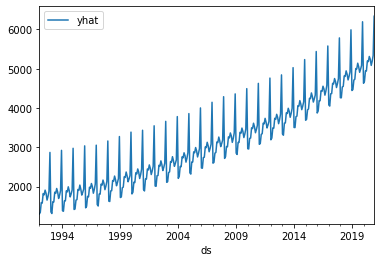

In [22]:
forecast.plot(x='ds',y='yhat')

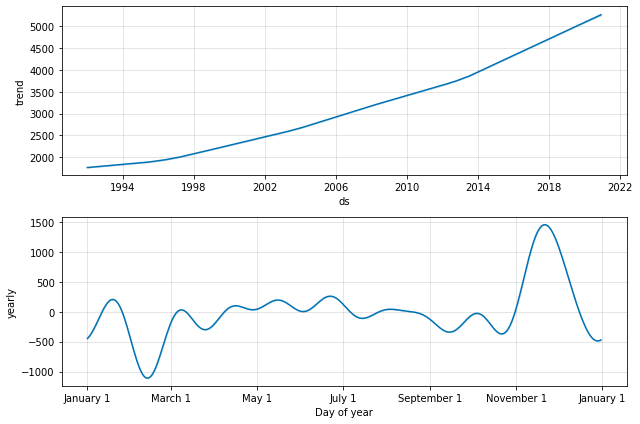

In [23]:
m.plot_components(forecast);
